### Import Library

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

# Algoritma yang digunakan
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

### Load Dataset

In [37]:
df=pd.read_csv("new_train.csv")

In [38]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [39]:
df["previous"].unique()

array([0, 1, 3, 4, 2, 6, 5, 7], dtype=int64)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


### Visualisasi Data

In [41]:
df["y"]=df["y"].map({"yes":1,"no":0})

<AxesSubplot: xlabel='job'>

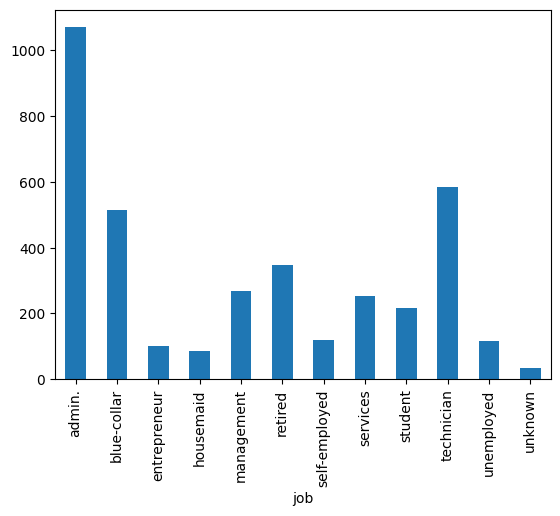

In [42]:
df.groupby("job")["y"].sum().plot(kind="bar")

<AxesSubplot: xlabel='education'>

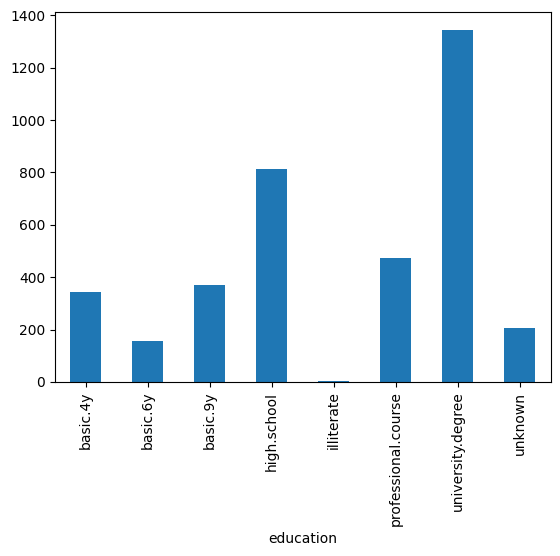

In [43]:
df.groupby("education")["y"].sum().plot(kind="bar")

<AxesSubplot: xlabel='month'>

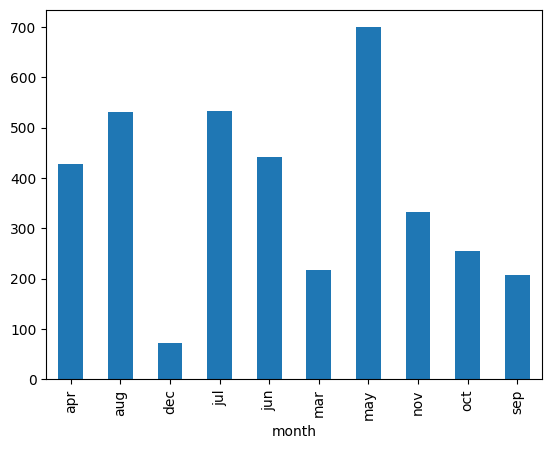

In [44]:
df.groupby("month")["y"].sum().plot(kind="bar")

<AxesSubplot: xlabel='marital'>

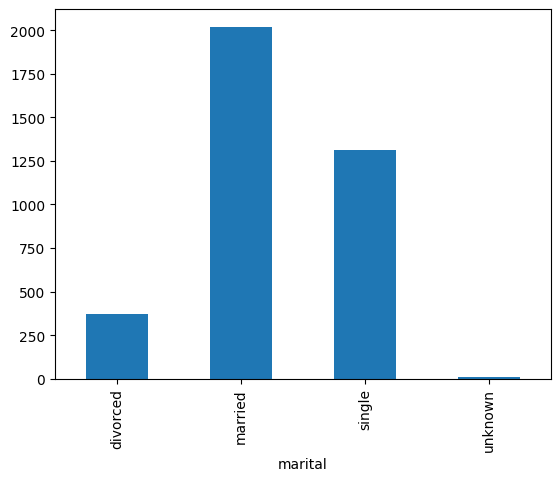

In [45]:
df.groupby("marital")["y"].sum().plot(kind="bar")

In [46]:
df["y"].value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [47]:
df.drop(["month","day_of_week"],axis=1,inplace=True)

In [48]:
df["job"].unique()

array(['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student',
       'services', 'technician', 'self-employed', 'management',
       'unemployed', 'unknown', 'housemaid'], dtype=object)

### Re-map Value

In [49]:
df["job"]=df["job"].map({"unemployed":1,"unknown":0,"housemaid":1,"student":1,"services":2,"technician":2,"self-employed":2,"management":2,"admin.":3,"retired":3,"entrepreneur":3,"blue-collar":3})

In [50]:
df["marital"].value_counts()

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64

In [51]:
df["marital"]=df["marital"].map({"married":2,"divorced":1,"single":1,"unknown":1})

In [52]:
df["education"].unique()

array(['basic.9y', 'university.degree', 'basic.4y', 'high.school',
       'professional.course', 'unknown', 'basic.6y', 'illiterate'],
      dtype=object)

In [53]:
df["education"]=df["education"].map({"illiterate":0,"basic.4y":0,"basic.6y":0,"basic.9y":0,"high.school":1,"professional.course":2,"university.degree":3,"unknown":1})

In [54]:
df["education"].value_counts()

0    10029
3     9736
1     8993
2     4192
Name: education, dtype: int64

In [55]:
df["default"]=df["default"].map({"unknown":0,"no":0,"yes":1})
df["housing"]=df["housing"].map({"unknown":0,"no":0,"yes":1})
df["loan"]=df["loan"].map({"unknown":0,"no":0,"yes":1})
df["contact"]=df["contact"].map({"cellular":0,"telephone":1})
df["pdays"]=df["pdays"].replace(999,0)
df["poutcome"]=df["poutcome"].map({"nonexistent":0,"failure":1,"success":2})

In [56]:
df

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,49,3,2,0,0,0,0,0,227,4,0,0,0,0
1,37,3,2,3,0,0,0,1,202,2,0,1,1,0
2,78,3,2,0,0,0,0,0,1148,1,0,0,0,1
3,36,3,2,3,0,1,0,1,120,2,0,0,0,0
4,59,3,1,3,0,0,0,0,368,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,2,1,1,0,1,0,0,192,1,0,0,0,0
32946,52,2,2,2,0,1,0,0,64,1,0,1,1,0
32947,54,3,2,0,0,0,1,0,131,4,0,0,0,0
32948,29,3,2,3,0,0,0,1,165,1,0,0,0,0


<AxesSubplot: >

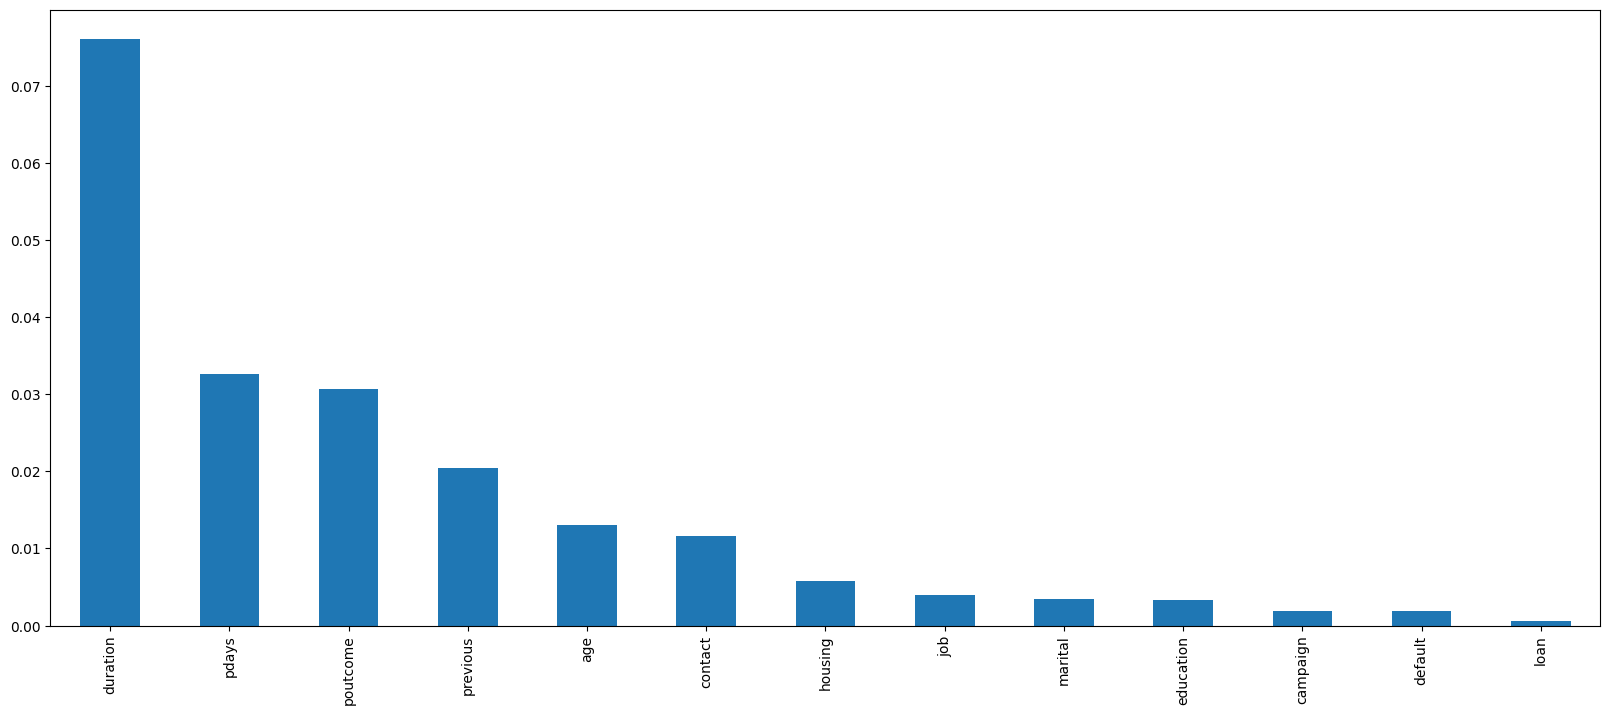

In [57]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(df[df.columns.difference(["y"])], df["y"])
mutual_info = pd.Series(mutual_info)
mutual_info.index = df[df.columns.difference(["y"])].columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [58]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=7)
sel_five_cols.fit(df[df.columns.difference(["y"])], df["y"])
columns=df[df.columns.difference(["y"])].columns[sel_five_cols.get_support()]
df1=df[columns]

In [59]:
y=df["y"]

In [60]:
df1

,age,campaign,contact,duration,pdays,poutcome,previous
0,49,4,0,227,0,0,0
1,37,2,1,202,0,1,1
2,78,1,0,1148,0,0,0
3,36,2,1,120,0,0,0
4,59,2,0,368,0,0,0
...,...,...,...,...,...,...,...
32945,28,1,0,192,0,0,0
32946,52,1,0,64,0,1,1
32947,54,4,0,131,0,0,0
32948,29,1,1,165,0,0,0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.3, random_state=5)

In [62]:
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter

rus = RandomUnderSampler(random_state=500)
X_under_train, y_under_train = rus.fit_resample(X_train, y_train)

print('Original dataset shape {}'.format(Counter(y_train)))
print('Undersampled dataset shape {}'.format(Counter(y_under_train)))


Original dataset shape Counter({0: 20470, 1: 2595})
Undersampled dataset shape Counter({0: 2595, 1: 2595})


### Algoritma Random Forest

In [63]:
radm_clf = RandomForestClassifier(n_estimators=80, max_features=7, n_jobs=-1)
radm_clf.fit( X_under_train,y_under_train )

RandomForestClassifier(max_features=7, n_estimators=80, n_jobs=-1)

In [64]:
metrics.roc_auc_score(y_train,radm_clf.predict(X_train))

0.8971070969029352

### Algoritma Decision Tree

In [69]:
dt = DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(X_under_train,y_under_train)
dt_test = dt.predict(X_test)

### Algoritma Logistic Regression

In [74]:
lr = LogisticRegression()
lr = lr.fit(X_under_train,y_under_train)
lr_test = lr.predict(X_test)

d:\Anaconda\envs\msib\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Algoritma K-Nearest Neighbor

In [80]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_under_train,y_under_train)
knn_pred = knn.predict(X_test)

### Algoritma Support Vector Machine

In [82]:
svc = SVC()
svc = svc.fit(X_under_train,y_under_train)
svc_pred = svc.predict(X_test)

### Evaluation

In [84]:
print("Evaluasi Setiap Algoritma Yang Dipakai : ")

print("1. Algoritma Random Forest")
print("Akurasi Saat Training : ",metrics.accuracy_score(y_train,radm_clf.predict(X_train))*100)
print("Akurasi Saat Testing  : ",metrics.accuracy_score(y_test,radm_clf.predict(X_test))*100)

print("2. Algoritma Decision Tree")
print("Akurasi Saat Training : ",metrics.accuracy_score(y_train,dt.predict(X_train))*100)
print("Akurasi Saat Testing  : ",metrics.accuracy_score(y_test,dt.predict(X_test))*100)

print("3. Algoritma Logistic Regression")
print("Akurasi Saat Training : ",metrics.accuracy_score(y_train,lr.predict(X_train))*100)
print("Akurasi Saat Testing  : ",metrics.accuracy_score(y_test,lr.predict(X_test))*100)

print("4. Algoritma K-Nearest Neighbor")
print("Akurasi Saat Training : ",metrics.accuracy_score(y_train,knn.predict(X_train))*100)
print("Akurasi Saat Testing  : ",metrics.accuracy_score(y_test,knn.predict(X_test))*100)

print("5. Algoritma Support Vector Machine")
print("Akurasi Saat Training : ",metrics.accuracy_score(y_train,svc.predict(X_train))*100)
print("Akurasi Saat Testing  : ",metrics.accuracy_score(y_test,svc.predict(X_test))*100)



Evaluasi Setiap Algoritma Yang Dipakai : 
1. Algoritma Random Forest
Akurasi Saat Training :  82.15477996965099
Akurasi Saat Testing  :  77.11684370257966
2. Algoritma Decision Tree
Akurasi Saat Training :  79.12854975070454
Akurasi Saat Testing  :  73.9706626201315
3. Algoritma Logistic Regression
Akurasi Saat Training :  81.97702146108823
Akurasi Saat Testing  :  81.82094081942337
4. Algoritma K-Nearest Neighbor
Akurasi Saat Training :  79.03750270973336
Akurasi Saat Testing  :  76.5402124430956
5. Algoritma Support Vector Machine
Akurasi Saat Training :  75.97658790375027
Akurasi Saat Testing  :  75.88265048052605


### Saving Model

In [67]:
import joblib
joblib.dump(radm_clf,"model1.pkl")

['model1.pkl']